CMP6202




# Library imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn is a useful library for Data Visualisation
from statsmodels.graphics.mosaicplot import mosaic
import missingno as msno
from scipy.stats import skewnorm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Extracting data from the source dataset(s)

* This can be found within the ["datasets.zip"](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8096164) zip file on Moodle

* Click here to download [Heart.csv](https://moodle.bcu.ac.uk/mod/resource/view.php?id=8122465) dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/AI/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Initial data checking

Let's describe all the attributes in our dataframe

In [5]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Then let's check their data types

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Converting nominal target into binary encoding

In [8]:
#le = LabelEncoder()
#df_heart["AHD"] = le.fit_transform(df_heart["AHD"])

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# EDA

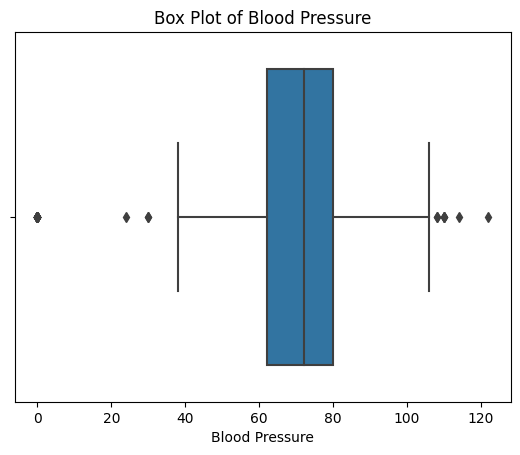

In [11]:
# Assuming 'blood_pressure' is the column name in your DataFrame
sns.boxplot(x=df['BloodPressure'])
plt.title('Box Plot of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.show()

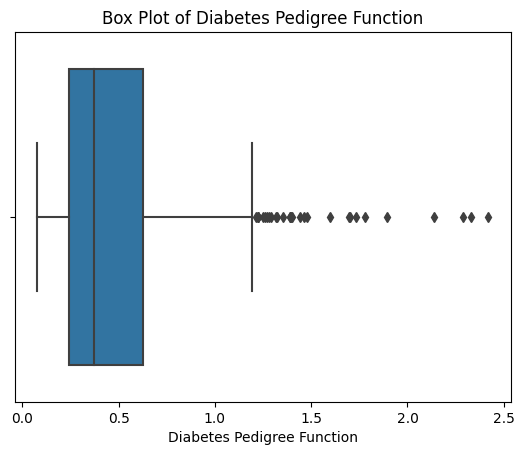

In [12]:
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.title('Box Plot of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.show()

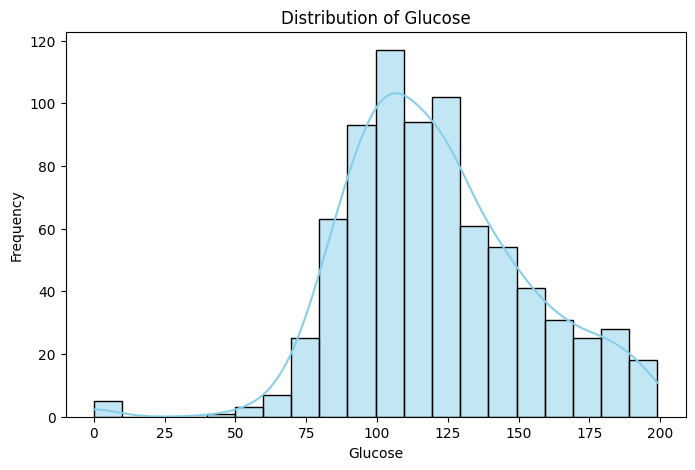

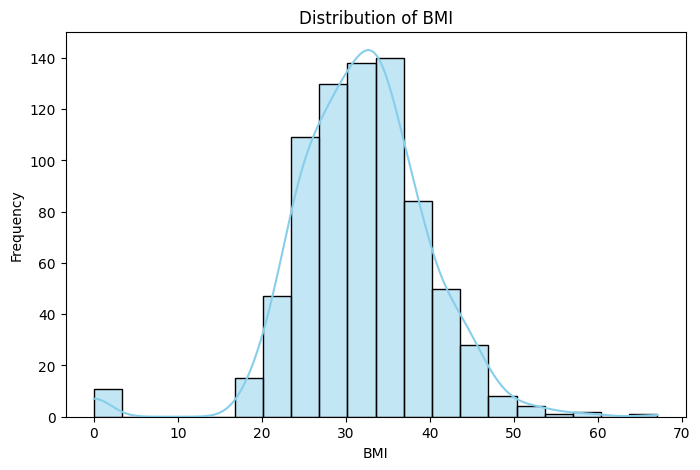

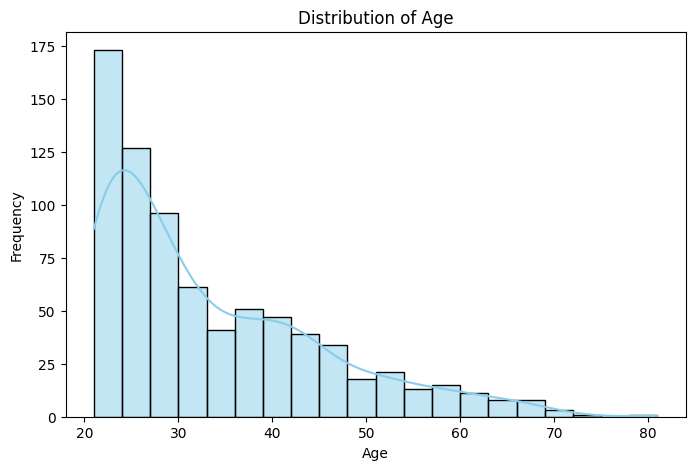

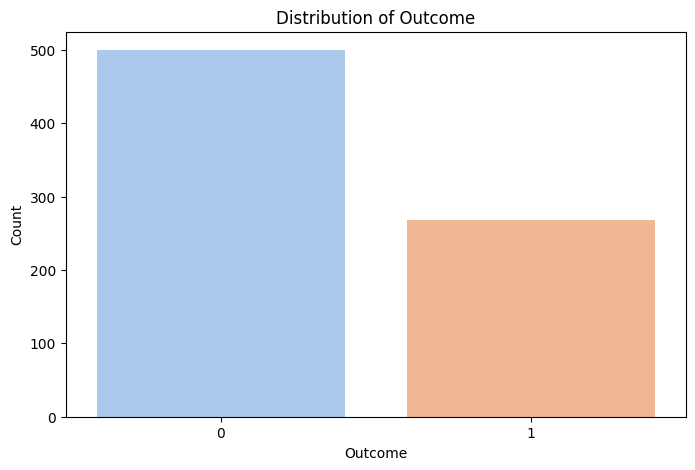

In [13]:
# Select features for univariate analysis
selected_features = ['Glucose', 'BMI', 'Age', 'Outcome']

# Plot histograms for each feature
for feature in selected_features:
    plt.figure(figsize=(8, 5))

    # For categorical 'Outcome', plot a bar chart
    if feature == 'Outcome':
        sns.countplot(x=feature, data=df, palette='pastel')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    else:
        # For numerical features, plot a histogram
        sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    plt.show()

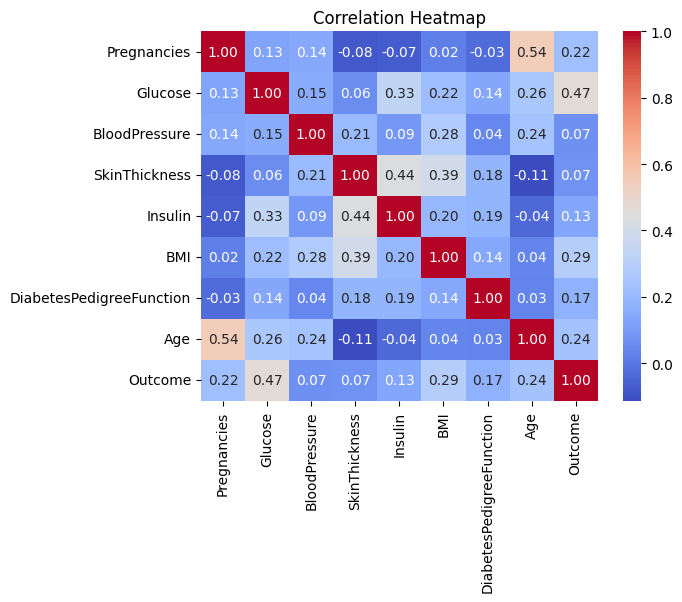

In [14]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

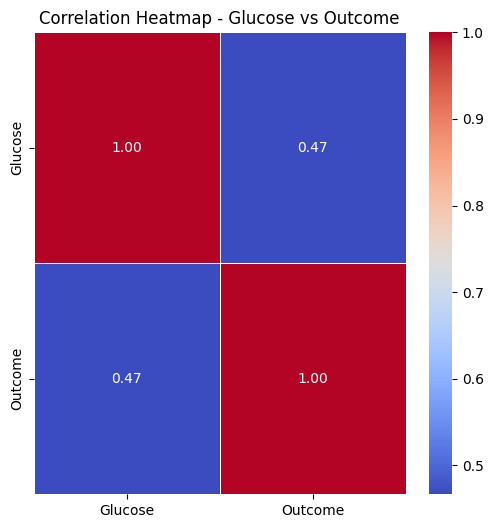

In [15]:
# Assuming df is your DataFrame
features = ["Glucose", "Outcome"]
subset_df = df[features]
correlation_matrix = subset_df.corr()
# Create a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - Glucose vs Outcome")
plt.show()

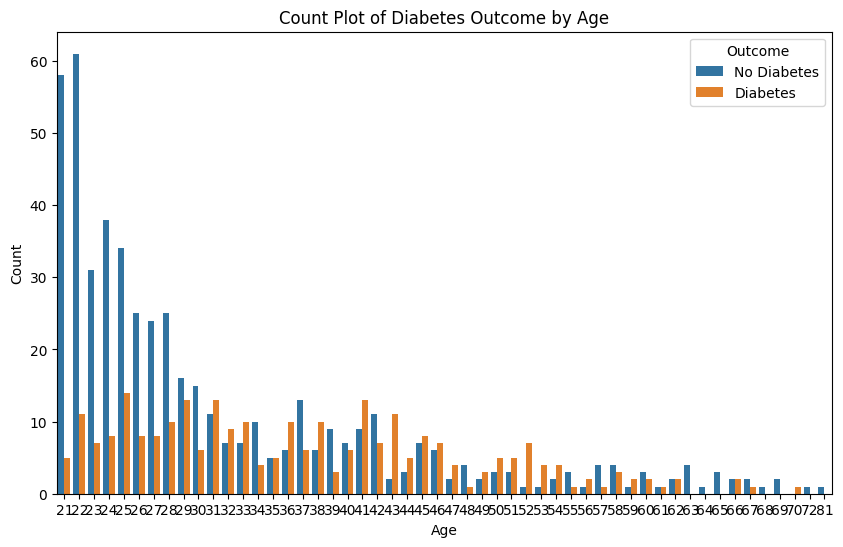

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Outcome', data=df)
plt.title('Count Plot of Diabetes Outcome by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()


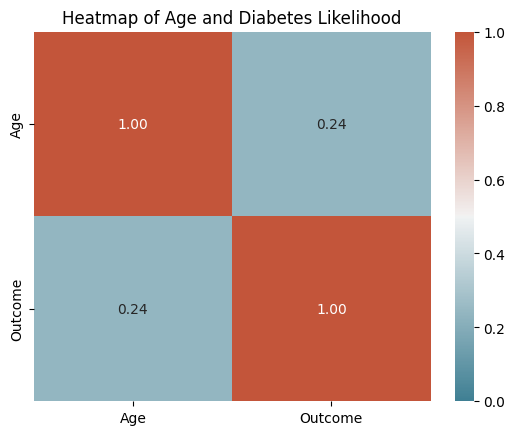

In [17]:
# Point-biserial correlation between Age and Outcome
correlation_matrix = df[['Age', 'Outcome']].corr()

# Create a custom colormap to highlight positive correlation
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", vmin=0)
plt.title('Heatmap of Age and Diabetes Likelihood')
plt.show()

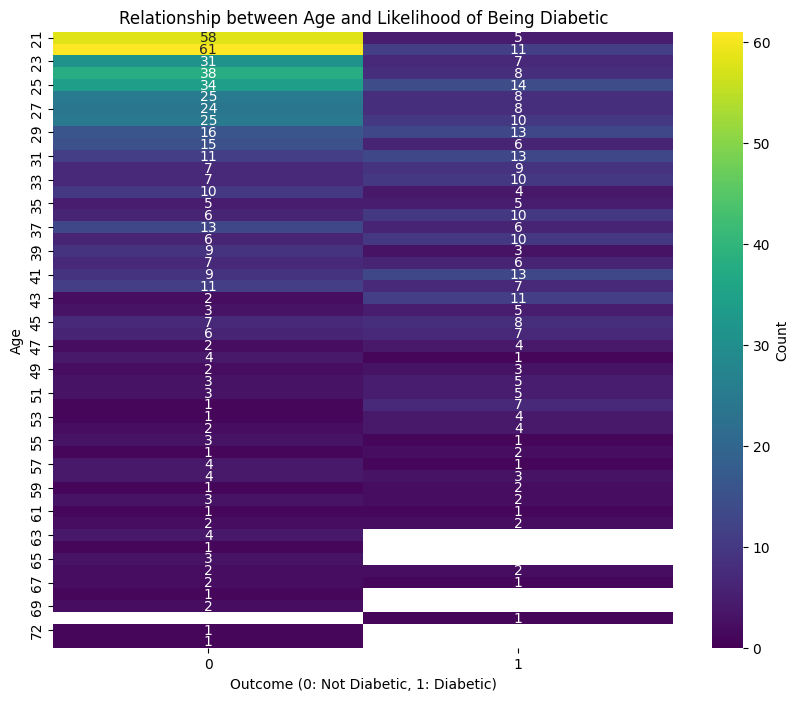

In [18]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Age', 'Outcome']].groupby(['Age', 'Outcome']).size().unstack(), cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Count'}, vmin=0)
plt.title('Relationship between Age and Likelihood of Being Diabetic')
plt.xlabel('Outcome (0: Not Diabetic, 1: Diabetic)')
plt.ylabel('Age')
plt.show()

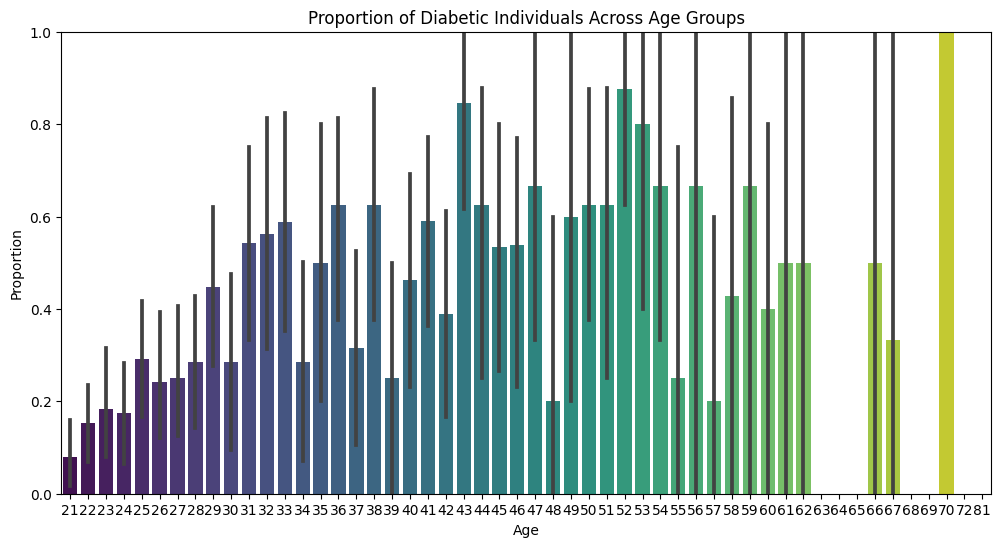

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Outcome', data=df, estimator=lambda x: sum(x) / len(x), palette='viridis')
plt.title('Proportion of Diabetic Individuals Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.ylim(0, 1)  # Set y-axis limit to represent proportions between 0 and 1
plt.show()


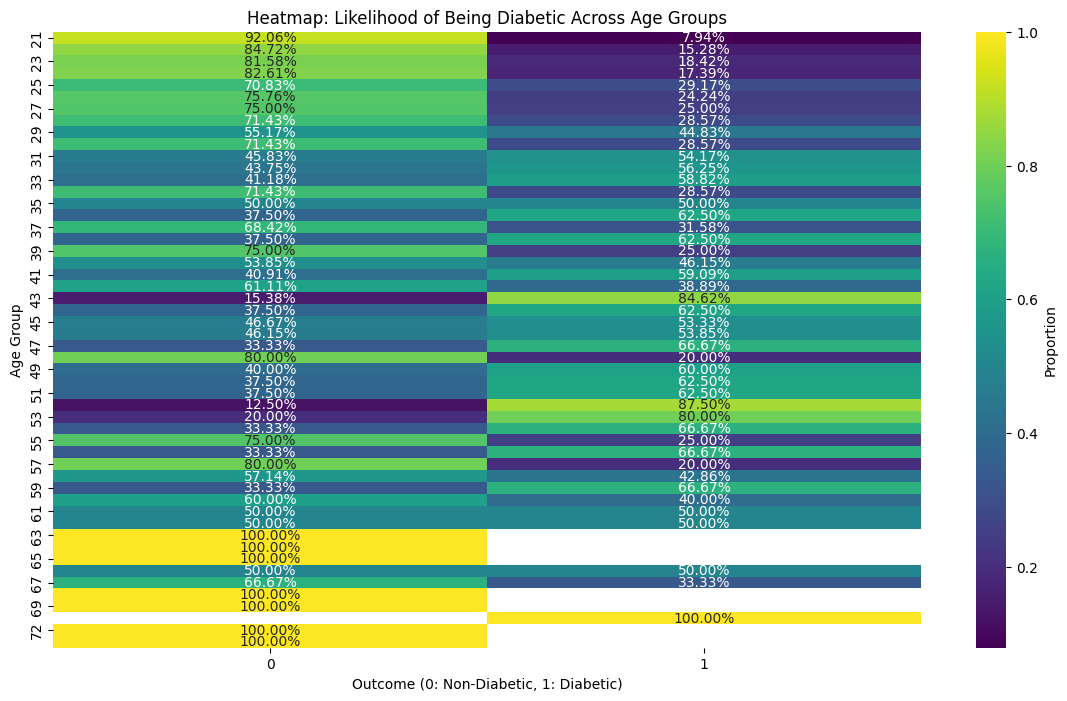

In [20]:
# Assuming your DataFrame is named df
plt.figure(figsize=(14, 8))
heatmap_data = df.groupby(['Age', 'Outcome']).size().unstack()

# Normalize the values to get proportions
heatmap_data = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2%", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap: Likelihood of Being Diabetic Across Age Groups')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Age Group')
plt.show()

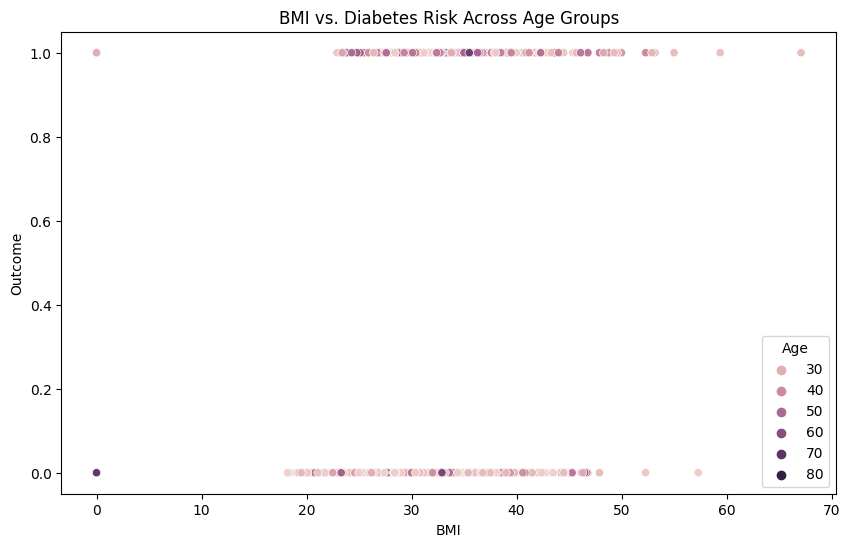

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Outcome', hue='Age', data=df)
plt.title('BMI vs. Diabetes Risk Across Age Groups')
plt.show()

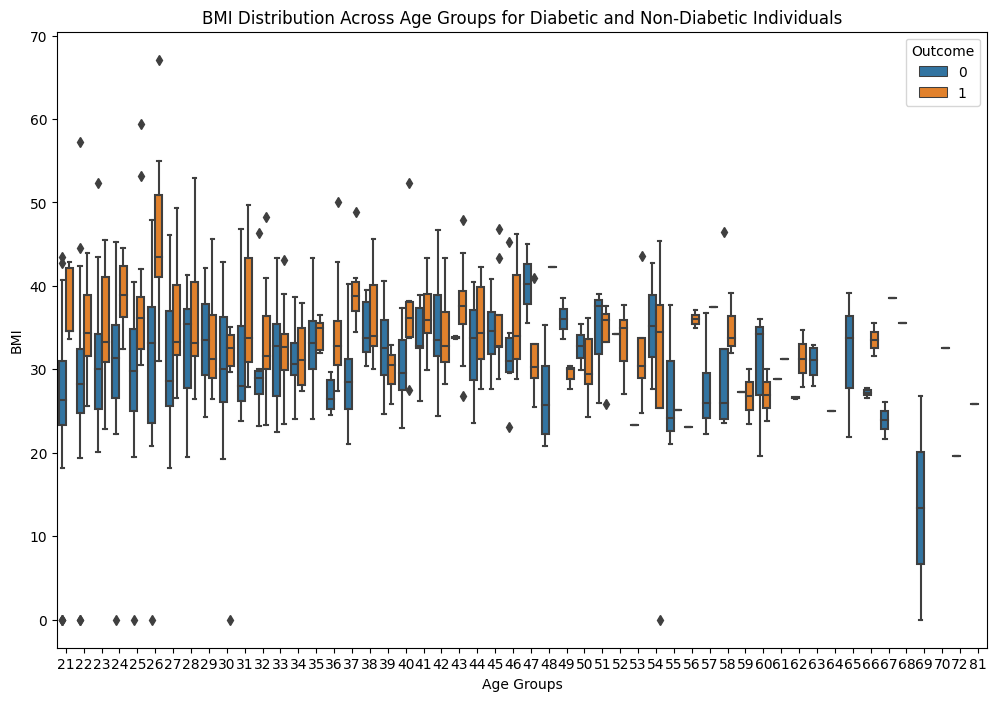

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('BMI Distribution Across Age Groups for Diabetic and Non-Diabetic Individuals')
plt.xlabel('Age Groups')
plt.ylabel('BMI')
plt.show()

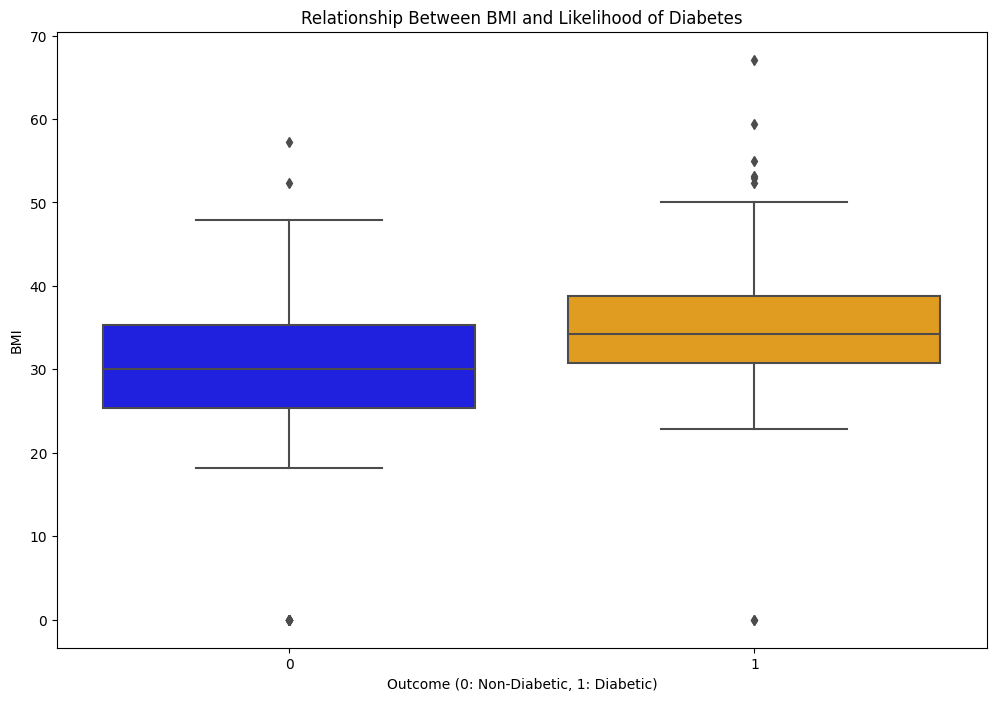

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outcome', y='BMI', data=df, palette={0: 'blue', 1: 'orange'})
plt.title('Relationship Between BMI and Likelihood of Diabetes')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()

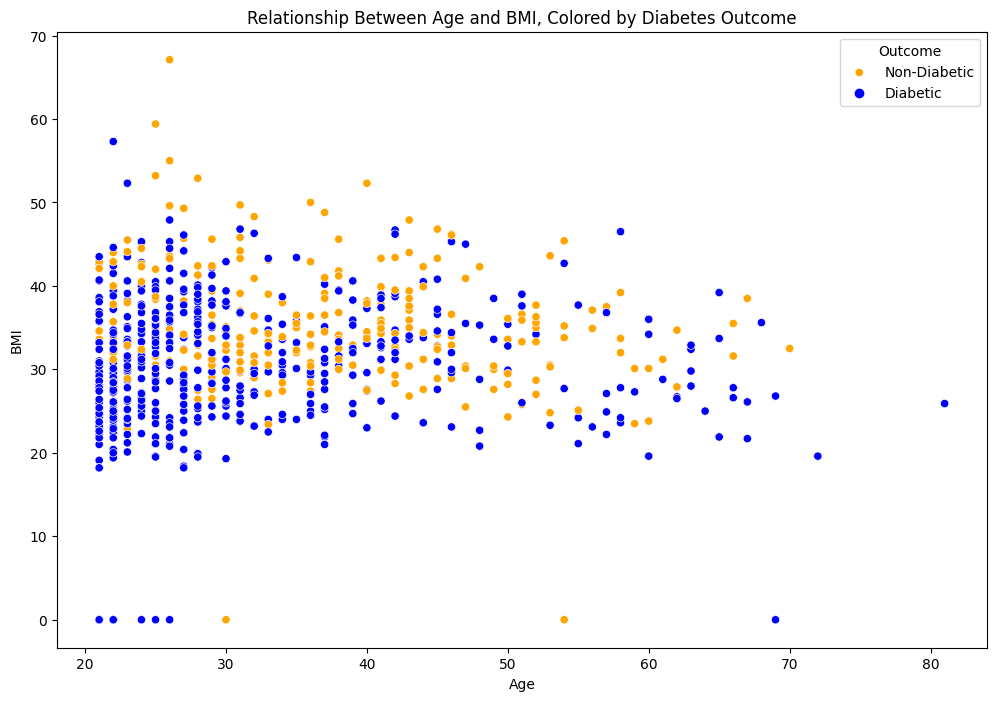

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='BMI', data=df, hue='Outcome', palette={0: 'blue', 1: 'orange'})
plt.title('Relationship Between Age and BMI, Colored by Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

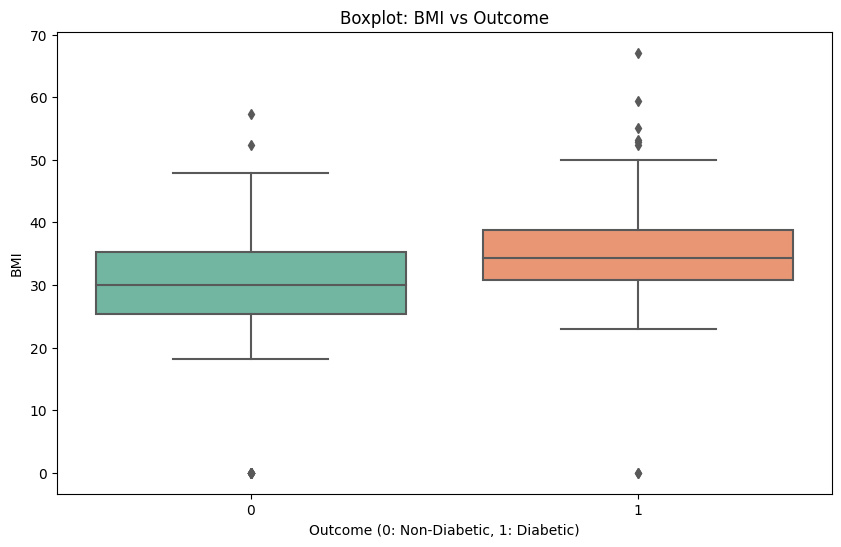

In [25]:
# Assuming your DataFrame is named 'df'
plt.figure(figsize=(10, 6))

# Boxplot for BMI and Outcome
sns.boxplot(x='Outcome', y='BMI', data=df, palette='Set2')

# Set plot labels and title
plt.title('Boxplot: BMI vs Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('BMI')

# Show the plot
plt.show()

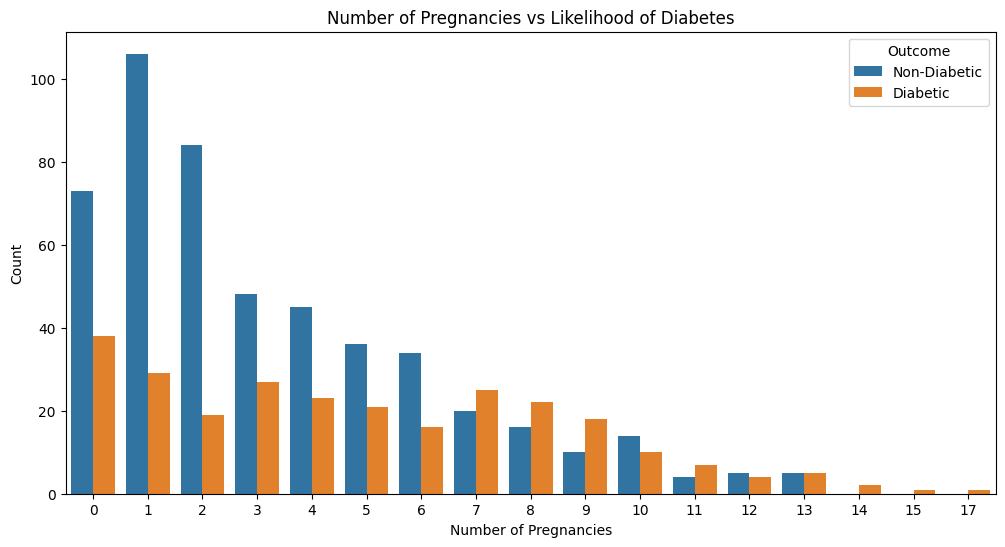

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Pregnancies', hue='Outcome')
plt.title('Number of Pregnancies vs Likelihood of Diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Non-Diabetic', 'Diabetic'])
plt.show()

<ipython-input-27-2469eedaa141>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pregnancies', y='Outcome', ci=None)


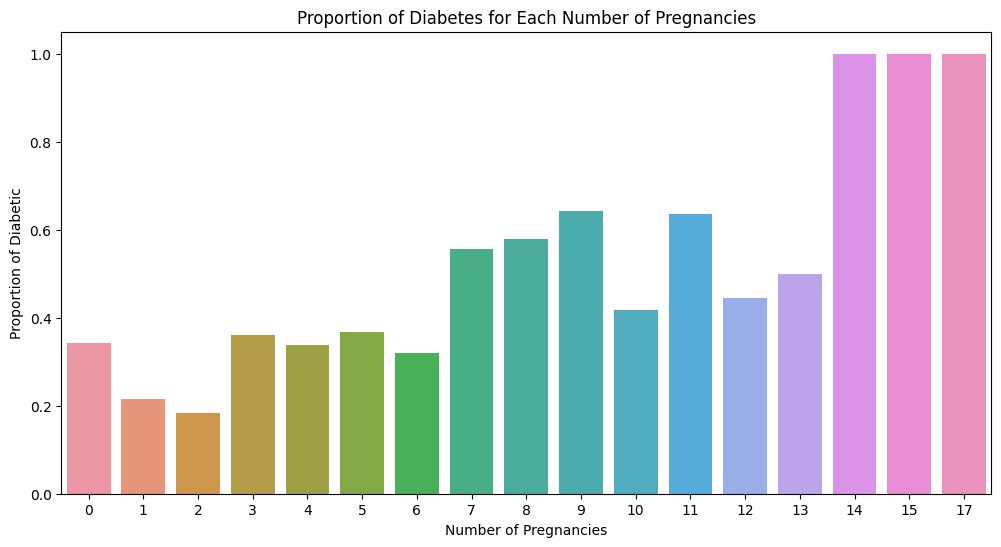

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Pregnancies', y='Outcome', ci=None)
plt.title('Proportion of Diabetes for Each Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Proportion of Diabetic')
plt.show()

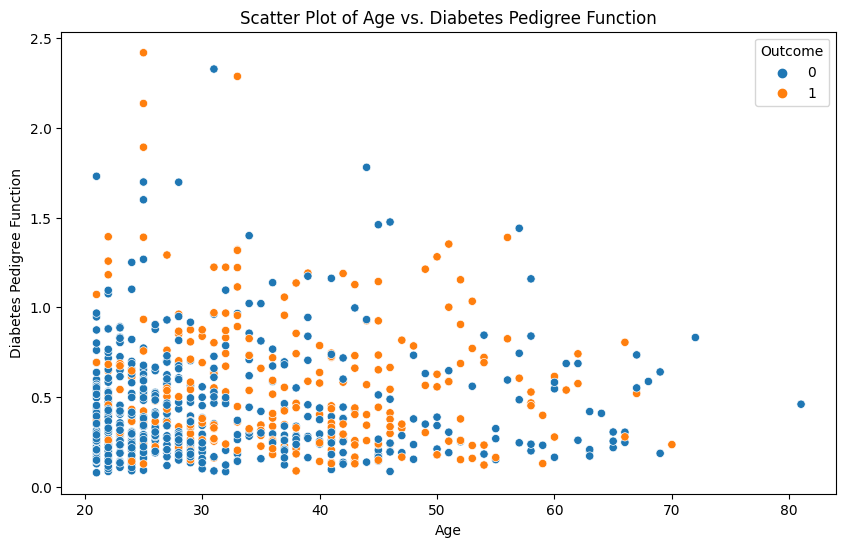

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='DiabetesPedigreeFunction', hue='Outcome')
plt.title('Scatter Plot of Age vs. Diabetes Pedigree Function')
plt.xlabel('Age')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

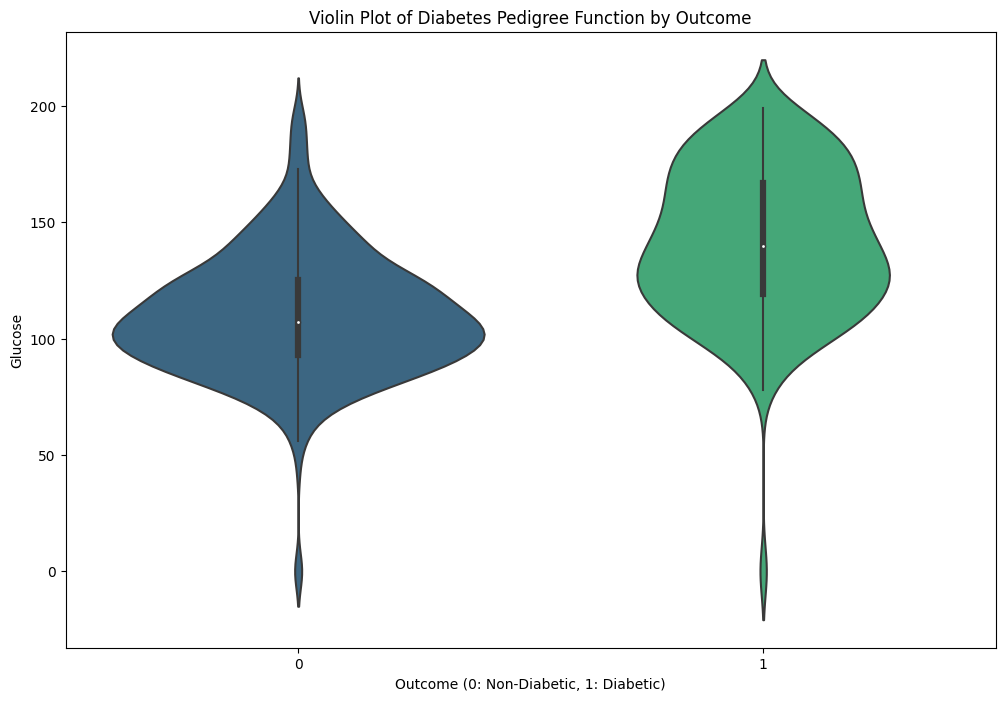

In [29]:

# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 8))
sns.violinplot(x='Outcome', y='Glucose', data=df, palette='viridis')
plt.title('Violin Plot of Diabetes Pedigree Function by Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Glucose')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

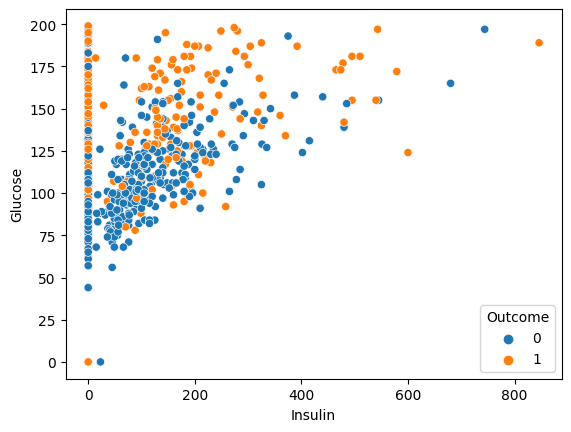

In [30]:
sns.scatterplot(data=df,x="Insulin",y="Glucose", hue="Outcome")
plt.show

In [31]:
df=df[df['Insulin']!=0]
df=df[df['Glucose']!=0]


<function matplotlib.pyplot.show(close=None, block=None)>

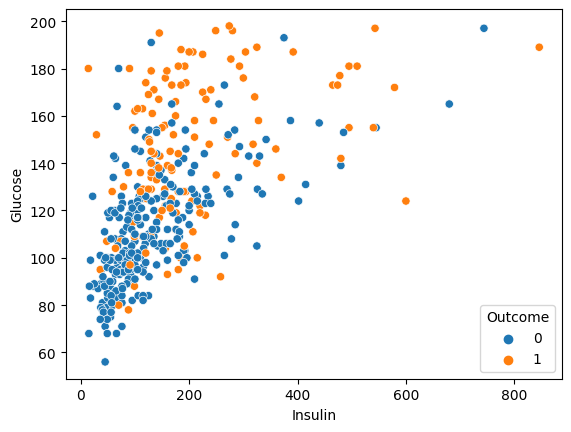

In [32]:
sns.scatterplot(data=df,x="Insulin",y="Glucose", hue="Outcome")
plt.show

<Axes: >

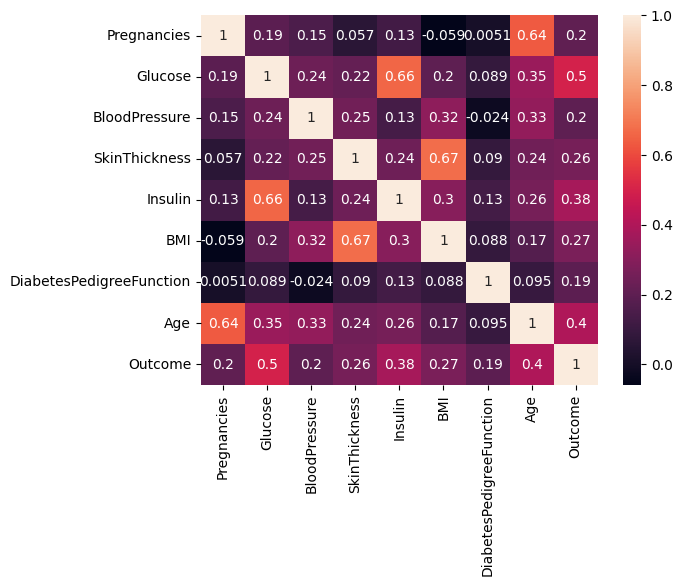

In [33]:
corr= df.corr(method='spearman')
sns.heatmap(corr,annot=True)

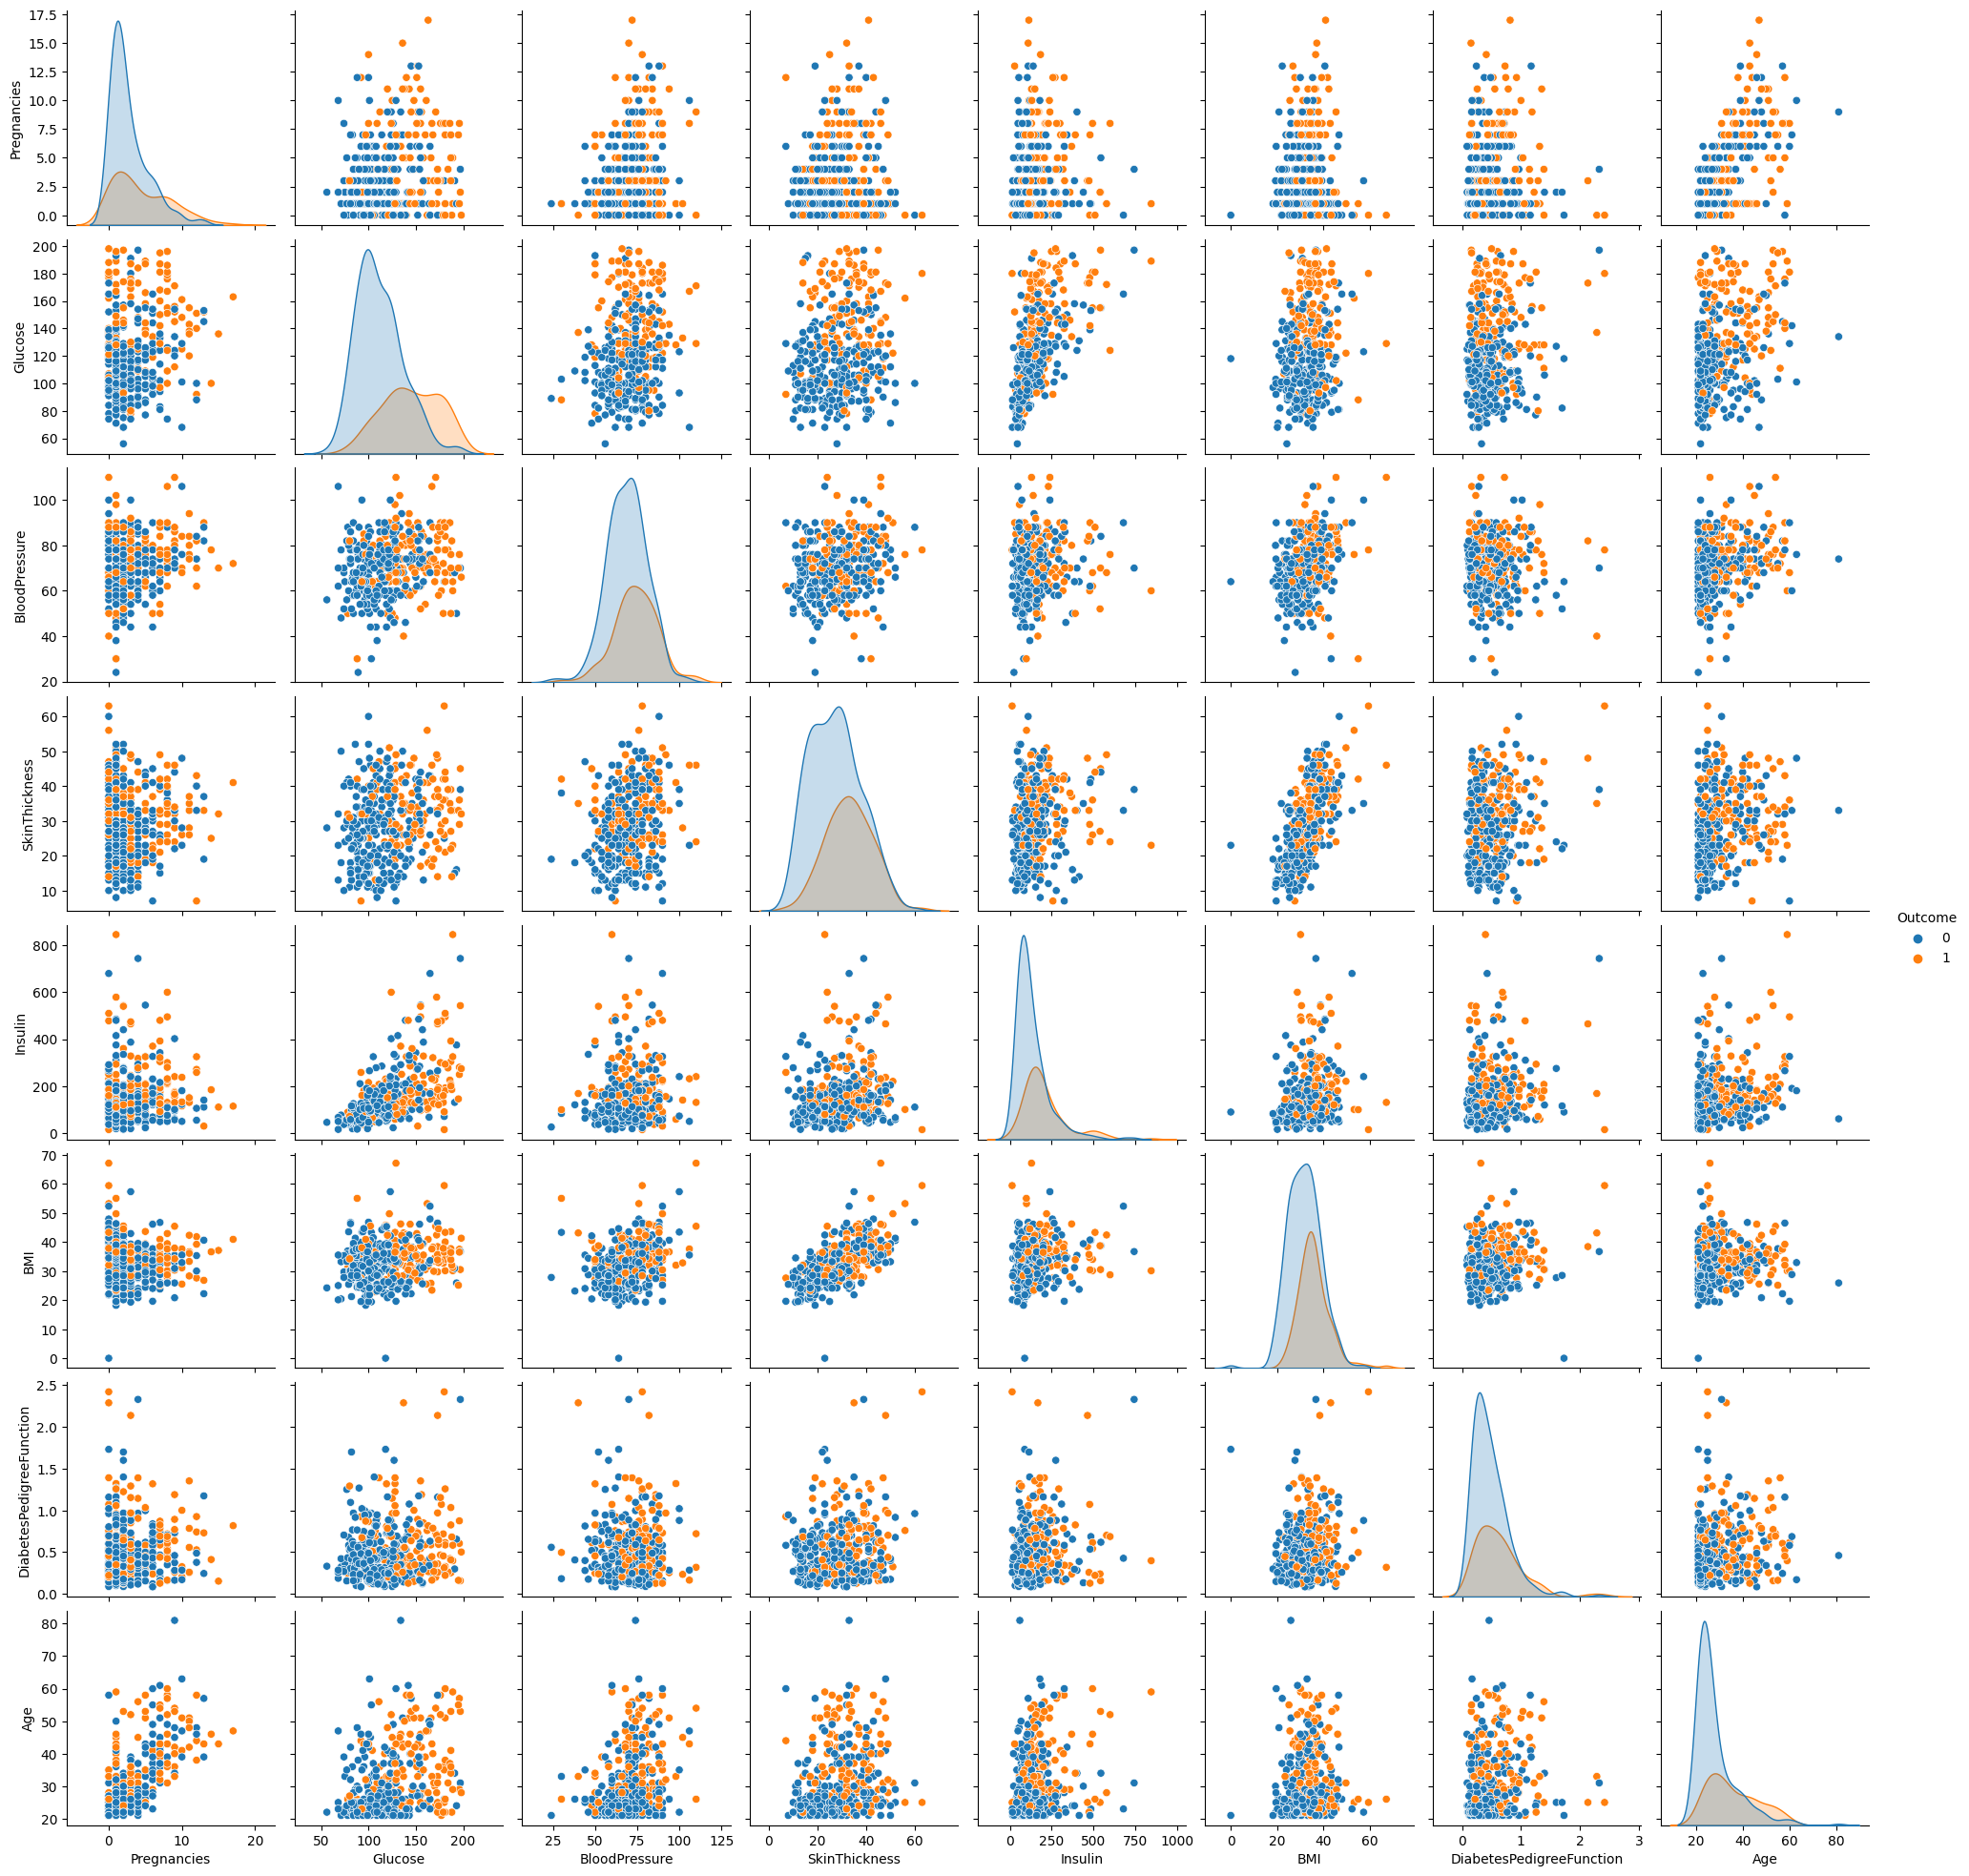

In [34]:
sns.pairplot(df, hue='Outcome')
plt.show()

### Pre-processing for training

#### Dealing with Missing Data in the Training set

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               393 non-null    int64  
 1   Glucose                   393 non-null    int64  
 2   BloodPressure             393 non-null    int64  
 3   SkinThickness             393 non-null    int64  
 4   Insulin                   393 non-null    int64  
 5   BMI                       393 non-null    float64
 6   DiabetesPedigreeFunction  393 non-null    float64
 7   Age                       393 non-null    int64  
 8   Outcome                   393 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.7 KB


In [36]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can also use the [Missingno](https://github.com/ResidentMario/missingno) library to provide some nice visualisations of our data and check for missing values.

What does this tell us about our data?
How else could we analyse this?

# Imputation for missing values

Many Machine Learning algorithms require that their input data contains no missing values, in that case what do we do when we have a record that contains some missing values for specific attributes / columns?

One way would be to simply eliminate those records that contain missing values from our dataset entirely - but this can introduce its own problems as we are potentially throwing away valuable data!

Another possible solution is to replace the missing values with a reasonable alternative based on some aspects of the particular variable in question.

We call this [imputation](https://scikit-learn.org/stable/modules/impute.html).

In [37]:
from sklearn.impute import SimpleImputer

1. ### dropping Skinthickness

In [38]:
df = df.drop('SkinThickness', axis=1)

2. ### SimpleImputer is Univariate imputer that offers straightforward strategies for efficiently filling in missing values in your data.

In [39]:
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame
df_with_nan = df.replace(0, np.nan)

# Specify the column you want to impute, e.g., 'Insulin'
column_to_impute = 'Insulin'

# Identify rows where the specified column has NaN values
nan_rows = df_with_nan[column_to_impute].isnull()

# Create a copy of the DataFrame to avoid modifying the original
df_imputed = df_with_nan.copy()

# Apply SimpleImputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')
df_imputed[column_to_impute] = imputer.fit_transform(df_imputed[[column_to_impute]])

# Check the result
print(df_imputed.head())

    Pregnancies  Glucose  BloodPressure  Insulin   BMI  \
3           1.0       89             66     94.0  28.1   
4           NaN      137             40    168.0  43.1   
6           3.0       78             50     88.0  31.0   
8           2.0      197             70    543.0  30.5   
13          1.0      189             60    846.0  30.1   

    DiabetesPedigreeFunction  Age  Outcome  
3                      0.167   21      NaN  
4                      2.288   33      1.0  
6                      0.248   26      1.0  
8                      0.158   53      1.0  
13                     0.398   59      1.0  


In [40]:
df_imputed.head(5)


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89,66,94.0,28.1,0.167,21,NaN
4,NaN,137,40,168.0,43.1,2.288,33,1.0
6,3.0,78,50,88.0,31.0,0.248,26,1.0
8,2.0,197,70,543.0,30.5,0.158,53,1.0
13,1.0,189,60,846.0,30.1,0.398,59,1.0


3. ## KNN imputer is a powerful tool for addressing missing data by leveraging the K-Nearest Neighbor algorithm to intelligently complete missing values with sophisticated strategies.

In [41]:
from sklearn.impute import KNNImputer

In [42]:
knn_imp = KNNImputer(n_neighbors=1)

In [43]:
knn_imp.fit_transform(df)

array([[  1.   ,  89.   ,  66.   , ...,   0.167,  21.   ,   0.   ],
       [  0.   , 137.   ,  40.   , ...,   2.288,  33.   ,   1.   ],
       [  3.   ,  78.   ,  50.   , ...,   0.248,  26.   ,   1.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,   0.766,  22.   ,   0.   ],
       [ 10.   , 101.   ,  76.   , ...,   0.171,  63.   ,   0.   ],
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ]])

In [44]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer



SimpleImputer()

## Model training

### Creating a train / test split

Let's create a train / test split of our Heart disease prediction data set.

Why would we split our data right at the beginning before we have done any exploratory data analysis, and well before we are looking at training our model?

Well the answer is simple, it all comes down to differentiating between **seen** and **unseen** data.

We have seen previously that the purpose behind splitting our data into **training** and **testing** sets is to have one set of data (the **"seen" training data**) that can be used for **developing our models** and another set of data (the **"unseen" testing data**) that allows us to **evaluate how well our model performs on data that it has not yet encountered**.

Splitting them into one data set for "learning" the patterns in the data and a separate one that acts as an examination of how well it has understood those patterns is very important because we want to minimise the chance of having **biased evaluation results**.

But the important thing to note here is that it isn't just the data we feed into the model directly during training that could bias how the model is developed, it is also data that we have seen as the Data Scientists / Machine Learning Engineers analysing it. By performing Exploratory Data Analysis on your whole dataset to start off with **you are already introducing bias into your experimental process** because the insights that you gain from the exploratory process are not just the data that should be **seen** (the training examples used to develop the model) but also the data that should be **unseen** (the test examples that represent "real world" data that has not been encountered yet by the model).

Further discussions on this topic can be found [here](https://stackoverflow.com/questions/54282411/machine-learning-project-split-training-test-sets-before-or-after-exploratory-d), [here](https://machinelearningmastery.com/data-preparation-without-data-leakage/), and [here](https://www.analyticsvidhya.com/blog/2021/07/data-leakage-and-its-effect-on-the-performance-of-an-ml-model/)

In [45]:
# We'll now use the train-test splitter inside the SKLearn package to give us two subsets of data
# one for training and one for testing, divided into the
# features (the X values) and the targets (the Y values)
# the \ allows us to have a line break in the code

# Split the data into training and testing sets 80-20
X_train, X_test, y_train, y_test = train_test_split(df_imputed.drop('Outcome', axis=1), df_imputed['Outcome'], test_size=0.2, random_state=42)



In [46]:
X_test.shape

(79, 7)

In [47]:
X_test.isna().sum()

Pregnancies                 12
Glucose                      0
BloodPressure                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

# MinMax Scaler
After encoding the dataset and spliting it into X_train, X_test, y_train, y_test, we'll proceed by applying either MinMax Scaler or Standard Scaler to standardise the feature values. This standardization step is essential to prepare the data for building K-Nearest Neighbor (KNN) alogrithm and conducting model training and evaluation on the Heart dataset.

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()


In [50]:
X_train_scaled = scaler.fit_transform(X_train)

In [51]:
X_train_scaled.shape

(314, 7)

In [52]:
X_test_scaled = scaler.transform(X_test)

In [53]:
# Replace NaN values with 0 in the scaled training set
X_train_scaled_filled = pd.DataFrame(X_train_scaled).fillna(0)

# Replace NaN values with 0 in the scaled testing set
X_test_scaled_filled = pd.DataFrame(X_test_scaled).fillna(0)

In [54]:
# Print the top 5 rows of the filled scaled training set
print("Top 5 rows of the filled scaled training set:")
print(X_train_scaled_filled.head())

# Print a separator line for better readability
print("\n" + "="*40 + "\n")

# Print the top 5 rows of the filled scaled testing set
print("Top 5 rows of the filled scaled testing set:")
print(X_test_scaled_filled.head(10))

Top 5 rows of the filled scaled training set:
          0         1         2         3         4         5         6
0  0.142857  0.335714  0.558140  0.165865  0.192229  0.276231  0.100000
1  0.142857  0.178571  0.720930  0.062500  0.190184  0.094647  0.016667
2  0.500000  0.500000  0.744186  0.112981  0.415133  0.113062  0.466667
3  0.071429  0.285714  0.511628  0.042067  0.059305  0.240685  0.083333
4  0.142857  0.171429  0.674419  0.067308  0.327198  0.516916  0.100000


Top 5 rows of the filled scaled testing set:
          0         1         2         3         4         5         6
0  0.428571  0.328571  0.581395  0.109375  0.388548  0.050964  0.400000
1  0.000000  0.507143  0.651163  0.235577  0.370143  0.307923  0.033333
2  0.214286  0.207143  0.395349  0.042067  0.196319  0.094647  0.116667
3  0.000000  0.757143  0.604651  0.103365  0.715746  0.288651  0.066667
4  0.000000  0.892857  0.744186  0.596154  0.513292  0.058672  0.083333
5  0.071429  0.507143  0.395349  0.313702  

### Making a simple KNN classifier


Let's now try to create a simple K-nearest neighbors classifier model.

Further information about this algorithm can be found in the official SKLearn documentation [here](https://scikit-learn.org/stable/modules/neighbors.html)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors= 5)


In [57]:
# Replace NaN values with 0 in the training set
y_train_filled = y_train.fillna(0)

# Replace NaN values with 0 in the testing set
y_test_filled = y_test.fillna(0)

In [58]:
# Check for NaN values in training set
print("NaN values in training set:")
print(pd.isna(X_train_scaled_filled).sum())

# Check for NaN values in testing set
print("\nNaN values in testing set:")
print(pd.isna(X_test_scaled_filled).sum())

NaN values in training set:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

NaN values in testing set:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64


In [59]:
knn_clf.fit(X_train_scaled_filled, y_train_filled)

KNeighborsClassifier()

## Model Evaluation

### Checking training results

Let's get the prediction results for our classifiers, checking **how well they perform on data that has already been seen** (the training set).

In [60]:
y_pred = knn_clf.predict(X_test_scaled_filled)

Then we want to have a look at how well the classifiers have performed, one data structure we can use for this is a [confusion matrix](https://developers.google.com/machine-learning/crash-course/classification/true-false-positive-negative).

Which will give us the amount of values for:
*   True Positives
*   False Positives
*   True Negatives
*   False Negatives





In [61]:
cm = confusion_matrix(y_pred, y_test_filled)
cm

array([[46, 14],
       [ 7, 12]])

In [62]:
# ?sns.heatmap

<Axes: >

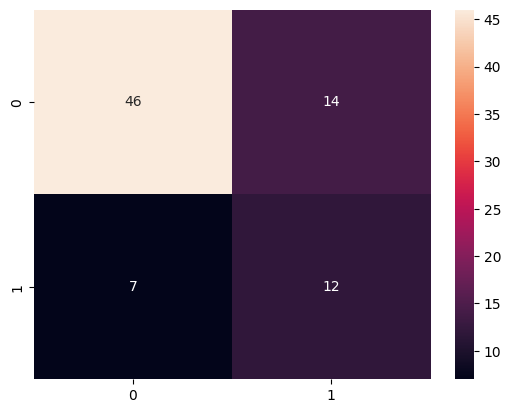

In [63]:
sns.heatmap(cm, annot= True)


The KNN has some false negatives and false positives when predicting on the training set

Let's now have a look at the training [Accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) of our models. Accuracy is just one metric that we use to measure the performance of our models, and in fact can give an [incomplete picture](https://tryolabs.com/blog/2013/03/25/why-accuracy-alone-bad-measure-classification-tasks-and-what-we-can-do-about-it) of the performance of your model on its own

In [64]:
print(accuracy_score(y_pred, y_test_filled))

0.7341772151898734


We can use the classification_report function on the metrics module to provide a more detailed picture of our classification scores.

In particular this will provide us with additional useful metrics, in particular: [precision, recall and F1-score](https://mlu-explain.github.io/precision-recall/)

In [65]:
y_pred_test = knn_clf.predict(X_test_scaled_filled)

# Now y_pred_test contains the predicted labels for the test set

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy on Testing Set:", accuracy_score(y_test_filled, y_pred_test))
print("Classification Report on Testing Set:")
print(classification_report(y_test_filled, y_pred_test))
print("Confusion Matrix on Testing Set:")
print(confusion_matrix(y_test_filled, y_pred_test))

Accuracy on Testing Set: 0.7341772151898734
Classification Report on Testing Set:
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.81        53
         1.0       0.63      0.46      0.53        26

    accuracy                           0.73        79
   macro avg       0.70      0.66      0.67        79
weighted avg       0.72      0.73      0.72        79

Confusion Matrix on Testing Set:
[[46  7]
 [14 12]]


In [66]:
# Evaluate on the training set
y_train_pred = knn_clf.predict(X_train_scaled_filled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy on Training Set:", accuracy_score(y_train_filled, y_train_pred))
print("Classification Report on Training Set:")
print(classification_report(y_train_filled, y_train_pred))
print("Confusion Matrix on Training Set:")
print(confusion_matrix(y_train_filled, y_train_pred))

Accuracy on Training Set: 0.8312101910828026
Classification Report on Training Set:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       210
         1.0       0.77      0.69      0.73       104

    accuracy                           0.83       314
   macro avg       0.81      0.80      0.80       314
weighted avg       0.83      0.83      0.83       314

Confusion Matrix on Training Set:
[[189  21]
 [ 32  72]]


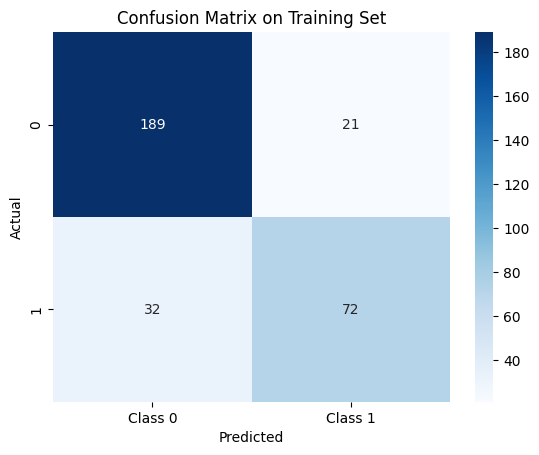

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix Heatmap
cm = confusion_matrix(y_train_filled, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix on Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



#Improving model

#Hyper-tuning parameters


In [68]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_filled, y_train_filled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [70]:
# Get the best KNeighborsClassifier model
best_knn_clf = grid_search.best_estimator_
print(best_knn_clf)

# Predict on the test set using the best model
y_pred_test = best_knn_clf.predict(X_test_scaled_filled)

KNeighborsClassifier(n_neighbors=13)


In [71]:
print("Accuracy on Testing Set:", accuracy_score(y_test_filled, y_pred_test))
print("Classification Report on Testing Set:")
print(classification_report(y_test_filled, y_pred_test))
print("Confusion Matrix on Testing Set:")
print(confusion_matrix(y_test_filled, y_pred_test))

Accuracy on Testing Set: 0.7468354430379747
Classification Report on Testing Set:
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82        53
         1.0       0.67      0.46      0.55        26

    accuracy                           0.75        79
   macro avg       0.72      0.67      0.69        79
weighted avg       0.74      0.75      0.73        79

Confusion Matrix on Testing Set:
[[47  6]
 [14 12]]
